# Script file for generating plots with ZFOURGE data

In [95]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt

font = {'family': 'serif', 'serif': ['cmr10']}
plt.rc('font', **font)
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore')  

In [82]:
# Read in CDFS main data
data = pd.read_csv('ZFOURGE/CDFS.tsv', sep='\t', skiprows=375)
cdfs_main = pd.DataFrame(data)
cdfs_main = cdfs_main.iloc[2:]
cdfs_main['Seq'] = cdfs_main['Seq'].astype(int)
cdfs_main = cdfs_main.sort_values(by='Seq')
cdfs_main = cdfs_main.set_index('Seq')

# Read in CDFS SFR data
data = pd.read_csv('ZFOURGE/CDFS_SFR.tsv', sep='\t', skiprows=76)
cdfs_sfr = pd.DataFrame(data)
cdfs_sfr = cdfs_sfr.iloc[2:]
cdfs_sfr['Seq'] = cdfs_sfr['Seq'].astype(int)
cdfs_sfr = cdfs_sfr.sort_values(by='Seq')
cdfs_sfr = cdfs_sfr.set_index('Seq')

# Read in CDFS Z data
data = pd.read_csv('ZFOURGE/CDFS_Z.tsv', sep='\t', skiprows=80)
cdfs_z = pd.DataFrame(data)
cdfs_z = cdfs_z.iloc[2:]
cdfs_z['Seq'] = cdfs_z['Seq'].astype(int)
cdfs_z = cdfs_z.sort_values(by='Seq')
cdfs_z = cdfs_z.set_index('Seq')

# Export to CSV
df = pd.concat([cdfs_main, cdfs_sfr, cdfs_z], axis=1)
df = df[df['Use'] == 1]
df.to_csv('ZFOURGE/CDFS_MAIN.csv', sep=',')

# SFR vs Mass

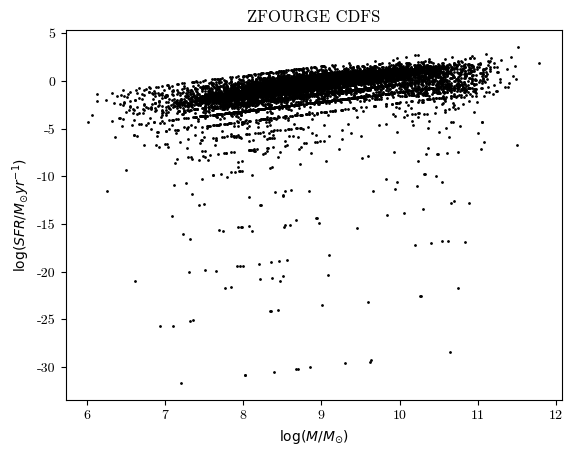

In [102]:
sfr_vs_mass = df[['lmass', 'lsfr']]

sfr_vs_mass = sfr_vs_mass.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)
sfr_vs_mass = sfr_vs_mass.replace('', pd.NA).dropna()

mass = sfr_vs_mass['lmass'].astype(float)
sfr = sfr_vs_mass['lsfr'].astype(float)

plt.scatter(mass, sfr, s=1, c='k')
plt.xlabel(r'$\log(M/M_{\odot})$')
plt.ylabel(r'$\log(SFR/M_{\odot}yr^{-1})$')
plt.title('ZFOURGE CDFS')
plt.show()